IMPORT AND SET UP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [2]:
titanic1 = pd.read_csv('titanic_train.csv') 
titanic2 = pd.read_csv('titanic_test.csv')
titanic = pd.concat([titanic1,titanic2], axis=0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA EXPLORATION & CLEANING

<AxesSubplot:xlabel='Survived', ylabel='count'>

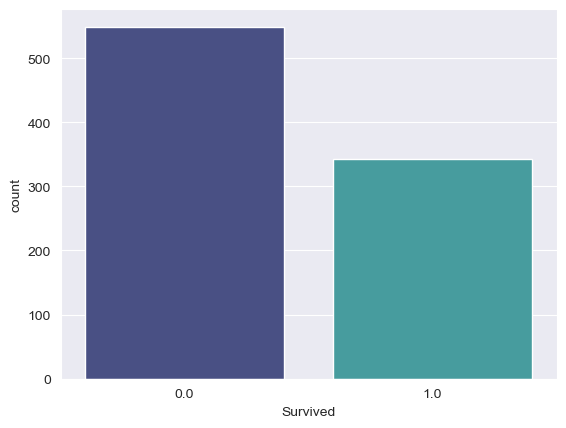

In [3]:
# survival rate

sns.countplot(x='Survived', data=titanic, palette='mako')

From the above countplot, the count of passenger that is survived is like ~3/4 of the unsurvived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

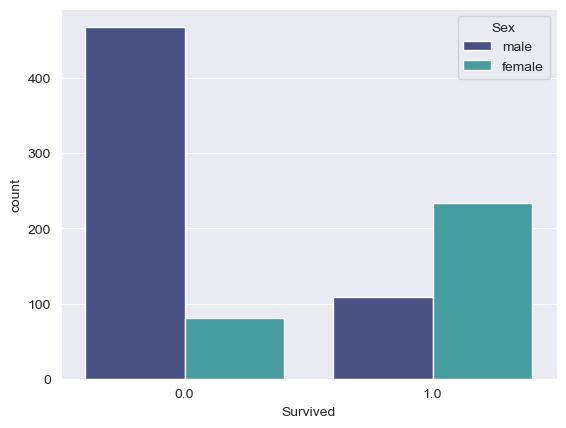

In [4]:
# survival by sex

sns.countplot(x='Survived', data=titanic, hue='Sex', palette='mako')

We can see that the count of the unsurvived male is multiple times of female - about 5 times.<br/>
While the count of survived female is double the survived male.

<AxesSubplot:xlabel='Survived', ylabel='count'>

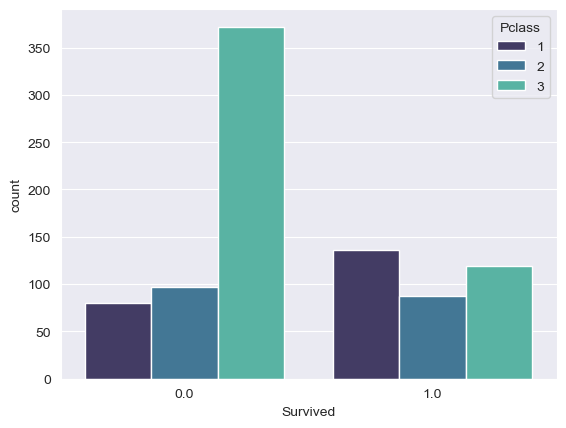

In [5]:
# survival by class

sns.countplot(x='Survived', data=titanic, hue='Pclass', palette='mako')

From the above plot, we can say that, the lower the class, the lower the chances to survive.

C:\Users\nannisaymy\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

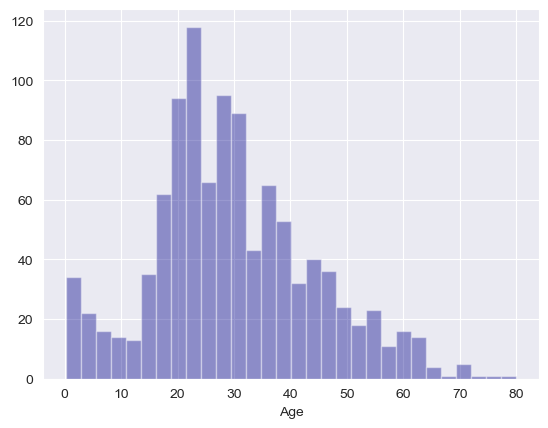

In [6]:
#distribution of Age in the Titanic

sns.distplot(titanic['Age'].dropna(), kde=False, bins=30, color='darkblue')

It can be seen that the Age has a bimodal distribution in the above plot.-> 0-2 years old & 20-30 years old in average.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

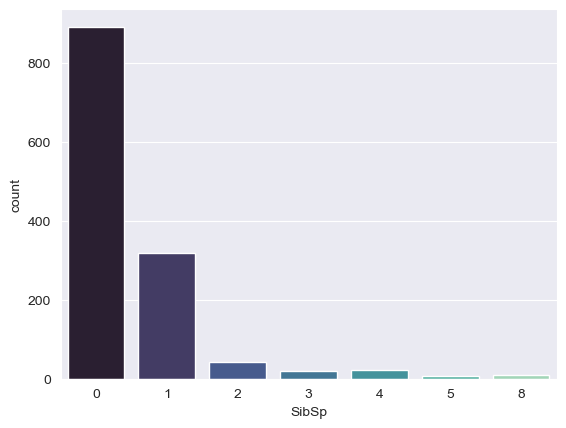

In [7]:
# SibSp

sns.countplot(x='SibSp', data=titanic, palette='mako')


Above plot explains that most of the passengers do not have siblings/spouse.

C:\Users\nannisaymy\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

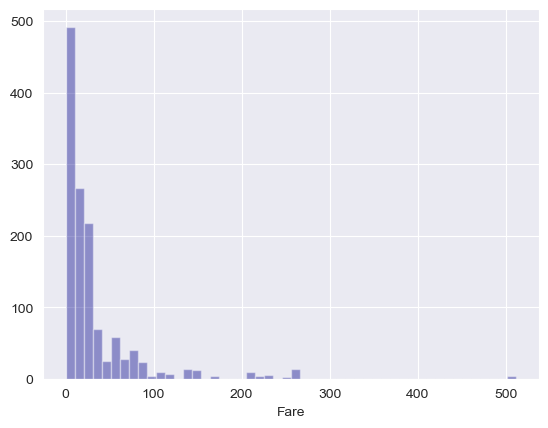

In [8]:
# fare

sns.distplot(titanic['Fare'], kde=False, color='darkblue')

Most passengers chose the cheaper fare.

CHECKING MISSING INFORMATION

<AxesSubplot:>

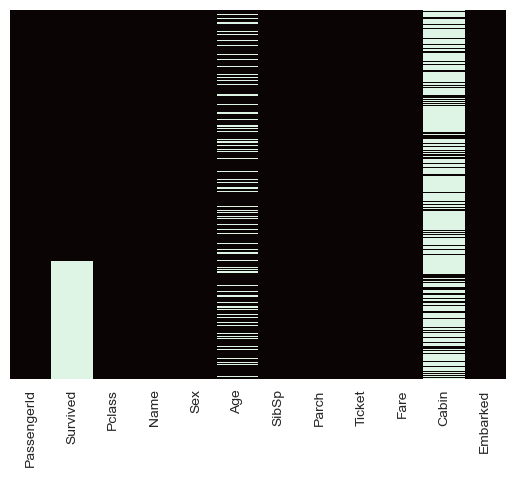

In [9]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='mako')

The light green strips showing in the above plot is the missing values.<br/>
We can see that both Age, Cabin and Survived columns has a lot of missing entries. <br/>
Since the Cabin column has less information and is meaningful even if we do engineering on it, thus we remove it.<br/><br/>

For the Age column, we will replace the missing entries with the mean.


In [10]:
titanic.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

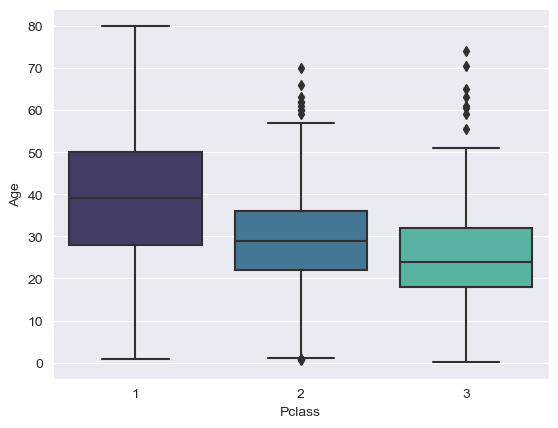

In [11]:
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='mako')

The above plot explains that, the passengers in the upper class older than the class below it.

In [12]:
# define mean for each class

Pclass1_mean = titanic[titanic['Pclass']==1]['Age'].mean()
Pclass2_mean = titanic[titanic['Pclass']==2]['Age'].mean()
Pclass3_mean = titanic[titanic['Pclass']==3]['Age'].mean()

In [13]:
# function to replace missing values in Age column with mean of every class

def replace_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age) :
        if Pclass == 1 :
            return Pclass1_mean
        if Pclass == 2 :
            return Pclass2_mean
        if Pclass == 3 :
            return Pclass3_mean
    else :
        return Age

In [14]:
# apply the function 

titanic['Age'] = titanic[['Age', 'Pclass']].apply(replace_age, axis=1)

In [15]:
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

<AxesSubplot:>

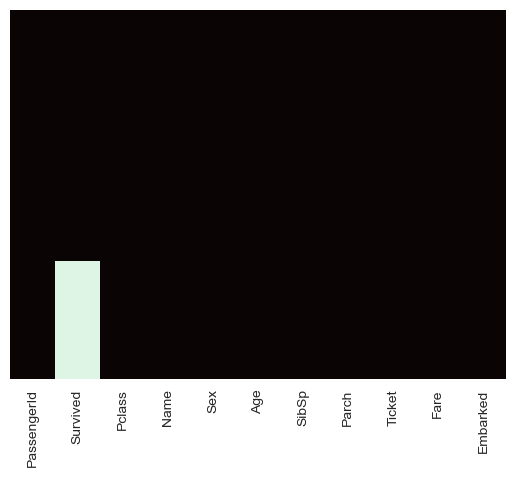

In [16]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='mako')

We can still see light green strips in the above heatmap plot. 
So, let's remove these row and other rows that has missing values.

In [17]:
titanic.dropna(inplace=True)

CONVERSION OF THE CATEGORICAL FEATURES INTO DUMMY VARIABLES

In [18]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
titanic = pd.concat([titanic,sex,embark], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [21]:
# remove unused column

titanic.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [22]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3,22.0,1,0,7.2500,1,0,1
1,1.0,1,38.0,1,0,71.2833,0,0,0
2,1.0,3,26.0,0,0,7.9250,0,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,0,1


TRAINING AND TESTING

In [23]:
X = titanic.drop('Survived', axis=1)

In [24]:
y =  titanic['Survived']

In [25]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [26]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
logmodel = LogisticRegression()

In [30]:
logmodel.fit(X_train, y_train)

C:\Users\nannisaymy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

PREDICTIONS

In [31]:
predictions = logmodel.predict(X_test)

EVALUATIONS

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       166
         1.0       0.74      0.69      0.71       101

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[141  25]
 [ 31  70]]


From the above report, we can see the accuracy is 79%. <br/>
And the error count is 25+31=56 out of 267. This quite a big number.<br/>
We can try to use other classification model to predict the survival of titanic passengers.